In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Rupita Tahsin

# __Unit Testing: unittest, doctest, and pytest__
<img alt="Code review icon" src="https://static.thenounproject.com/png/101170-200.png">

Image From: https://static.thenounproject.com/

# Learning objectives

At the end of the exercise, you should be able to:
- Implement unittest to test your code.
- Use doctest to test code based on DocString.
- Use pytest to test code.

# Outline
</p>

1. [Review of pre-class assignment](#preclass)
1. [Unit testing with unittest](#unittest)
1. [Another unittest example](#example)
1. [Beyond unittest](#beyond)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

No we did not face any problem with the pre-class as the video was very detailed and step by step.

---
<a name="unittest"></a>
# 2. Unit Testing with `unittest`

## 2.1 Testing your pre-class code

In your pre-class exercise you have created:

- `Circles.py`: determine the 
- `Circles_test.py`

&#9989; <font color=blue>**DO THIS:**</font> Make sure the code you created are in the same folder as the notebook. Test your codes by running the following 3 code blocks.

- 1st code block: should return `3.141592653589793`
- 2nd code block: should throw an ValueError
- 3rd code block: should say "Ok"

If any of the above is not true, you need to fix it!

In [1]:
from Circles import circle_area

circle_area(1)

3.141592653589793

In [2]:
# This should raise a ValueError with your custom message
circle_area(-1)

ValueError: The radius cannot be negative.

In [3]:
# This should say ok
!python -m unittest Circles_test

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


## 2.2 Deal with other issues

Your code should be able to deal with the situation when a negative value is passed as the radius of a circle already. How about other situations? 

&#9989; <font color=blue>**DO THIS:**</font> Run the following code block.

In [4]:
radii = [2+5j, True, "radius"]
message = "Area of circles with r = {radius} is {area}."

for r in radii:
    A = circle_area(r)
    print(message.format(radius=r,area = A))

TypeError: '<' not supported between instances of 'complex' and 'int'

&#9989; <font color=blue>**DO THIS:**</font> Modify your `Circles_test.py` to include a `test_type` function that tests whether the following is passed to `circle_area`:

- `5+4j` (an imaginary number).
- `True` (a boolean).
- `radius` (a string).

The modification should check that only the right type of object is passed to the function. We do this by raising a `TypeError`, similar to how we raised a `ValueError`. 

In [5]:
# put your Circles_test.py code here

import unittest
from Circles import circle_area
from math import pi

class TestCircleArea(unittest.TestCase):
    def test_area(self):
        #Test areas when radius is >=0
        self.assertAlmostEqual(circle_area(1),pi)
        self.assertAlmostEqual(circle_area(0),0)
        self.assertAlmostEqual(circle_area(3.5),pi*(3.5**2))
        
    def test_values(self):
        #making sure value errors are raised when necessary
        self.assertRaises(ValueError, circle_area, -2)
        
    def test_type(self):
        #Ensuring that type errors are raised when necessary
        self.assertRaises(TypeError, circle_area, 5+4j)
        self.assertRaises(TypeError, circle_area, True)
        self.assertRaises(TypeError, circle_area, "Radius")

In [6]:
# run unit test
!python -m unittest Circles_test

...
----------------------------------------------------------------------
Ran 3 tests in 0.000s

OK


&#9989; <font color=blue>**DO THIS:**</font> Based on the test result, modify your `Circles.py` to include modifications that will check that only the right type of object is passed to the function. We do this by raising a `TypeError`, similar to how we raised a `ValueError`. Put your new `Circles.py` code below.

In [7]:
# put your Circles.py code here

from math import pi

def circle_area(r):
    if type(r) not in [int, float]:
        raise TypeError("The radius must be a non-negative real number.")
    if r<0:
        raise ValueError("The radius cannot be negative.")
    return pi*(r**2)

---

<a name="example"></a>

# 3. Another unitest example

In the following image you can see the relationship between a linear index and a imposed structure that we give it to represent the row and column of the array.. For example:

- With an index of 98, (row, column) = (2, 0)
- With an index of 99, (row, colimn) = (2, 1)

<img src="https://lh5.googleusercontent.com/tpc1tFPULkPDt1q03E1nPkllHRO60jYyL-rZWmiJLM0AQtVkm1-EF6Pf0yKrm6S5ifVxJ1knHLpVRv7Fsu_pP-rzrauVa2dp2DLrAx2iya9Jbqs2gRWJJ3J-uBqE=w740" alt = "Visual relationship between linear index and a 2D index" width=600 />

## 3.1 A problematic function converting labels to indices

&#9989; **<font color=blue>DO THIS:</font>** Run the following function called `LabelToIndex` that:

- Takes in three arguments:
  - `n_row`: Number of rows
  - `n_col`: Number of column
  - `label`: the linear index  
- Return the row and column for that index. 

Note that this function does not give us the right value on purpose. We want to use unit test to catch issue with the program.

In [50]:
import math

def LabelToIndices_given(n_row, n_col, label):
    """function for converting linear label of grid to indices of row and column"""     
    col = label%n_row
    row = math.floor((label)/n_row)

    return (row, col)

In [53]:
#Corrected code for correct values of indices

def LabelToIndices(n_row, n_col, label):
    """function for converting linear label of grid to indices of row and column"""     
    col = (label+1)%n_row
    row = math.floor((label+1)/n_row)+1

    return (row, col)


In [58]:
# Expect returning (2, 1)

print("Initial values",LabelToIndices_given(99, 49, 99))
print("Corrected values",LabelToIndices(99, 49, 99))

Initial values (1, 0)
Corrected values (2, 1)


In [59]:
# Expect returning (2, 0)

print("Initial values",LabelToIndices_given(99, 49, 98))
print("Corrected values",LabelToIndices(99, 49, 98))

Initial values (0, 98)
Corrected values (2, 0)


&#9989; <font color=red>**QUESTION:**</font> What's wrong with the code? Don't fix the problems - we want unittest to catch it later.

<font size=+3>&#9998;</font> Replace with your answer to the above question!

I suspect the issue is that the remainder of the division is beng ignored here in each step and the first row and column with index 0 is not being accounted for in the column and row counting.

## 3.2 Unit testing LabelToIndicies

In the `unittest` module, the `TestCase` class provides several `assert` methods to check for and report failures. The following table lists a few commonly used methods (see [original documentation](https://docs.python.org/3/library/unittest.html):

| Method | Checks that |
| :- | :- |
| assertEqual(a, b) | a == b |
| assertTrue(x) | bool(x) is True |
| assertIs(a, b) | a is b |
| assertIn(a, b) | a in b |
| assertRaises(exc, fun, ...) | fun(...) raises exc |

&#9989; **<font color=blue>DO THIS:</font>** Put the `LabelToIndices` code into a Python program file called `LabelIndices.py`.

Then create a `LabelIndices_test.py` file for unit testing the `LabelToIndices` function. Specifically the unit test should test if:
  - `n_row=99, n_col=49, label=98` will output (2,0).

In [66]:
# put your code in LabelIndices_test.py here

import unittest

from LabelIndices import LabelToIndices

class TestLabel(unittest.TestCase):
    def test_index(self):
        #Test if the generated indices are correct
        self.assertEqual(LabelToIndices(99,49,98),(2,0))
       


&#9989; **<font color=blue>DO THIS:</font>** Now run the unit test and paste the test results below.

In [67]:
!python -m unittest LabelIndices_test.py

F
FAIL: test_index (LabelIndices_test.TestLabel)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\alamsaim\CMSE 802\Day 13\LabelIndices_test.py", line 8, in test_index
    self.assertEqual(LabelToIndices(99,49,98),(2,0))
AssertionError: Tuples differ: (0, 98) != (2, 0)

First differing element 0:
0
2

- (0, 98)
+ (2, 0)

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (failures=1)


<font size=+3>&#9998;</font> Replace with your answer to the above question!


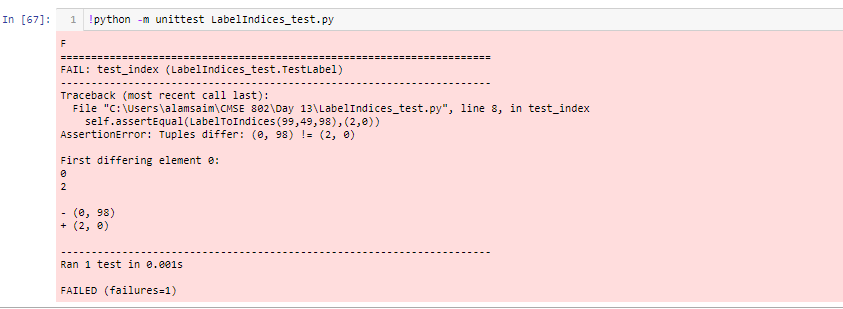

---
<a name="beyond"></a>
# 4. Beyond `unittest`

## 4.1 `doctest`

Another type of unit tester is ```doctest```.  This is a clever solution that includes the tests inside a function's docstring.  See the docstrings for ```LabelToIndices``` (copied below) and note the "usage" section is one such test. The usage section, indicated by '>>>' at the beginning of the line, defines the function name and parameters used for test. Line below 'usage' line defines expected return values from the function.

&#9989; **<font color=blue>DO THIS:</font>** We can run all of the tests in a jupyter notebook using the following command:

In [36]:
import math

def LabelToIndices(n_row, n_col, label):
    """function for converting linear label of grid to indices of row and column

    Usage:
    >>> LabelToIndices(99, 49, 98)
    (2, 0)
    """     
    col = label%n_row              
    row = math.floor(label/n_row) 

    return (row, col)

# Conduct doctest
import doctest
doctest.testmod(verbose=True)

Trying:
    LabelToIndices(99, 49, 98)
Expecting:
    (2, 0)
**********************************************************************
File "__main__", line 7, in __main__.LabelToIndices
Failed example:
    LabelToIndices(99, 49, 98)
Expected:
    (2, 0)
Got:
    (0, 98)
6 items had no tests:
    __main__
    __main__.TestCircleArea
    __main__.TestCircleArea.test_area
    __main__.TestCircleArea.test_type
    __main__.TestCircleArea.test_values
    __main__.circle_area
**********************************************************************
1 items had failures:
   1 of   1 in __main__.LabelToIndices
1 tests in 7 items.
0 passed and 1 failed.
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

&#9989; **<font color=blue>DO THIS:</font>** Correct the code above and run `doctest` again so the test would not fail.

In [69]:
#Corrected code

def LabelToIndices(n_row, n_col, label):
    """function for converting linear label of grid to indices of row and column

    Usage:
    >>> LabelToIndices(99, 49, 98)
    (2, 0)
    """     
    col = (label+1)%n_row              
    row = math.floor((label+1)/n_row)+1 

    return (row, col)

# Conduct doctest
import doctest
doctest.testmod(verbose=True)

Trying:
    LabelToIndices(99, 49, 98)
Expecting:
    (2, 0)
ok
9 items had no tests:
    __main__
    __main__.LabelToIndices_given
    __main__.TestCircleArea
    __main__.TestCircleArea.test_area
    __main__.TestCircleArea.test_type
    __main__.TestCircleArea.test_values
    __main__.TestLabel
    __main__.TestLabel.test_index
    __main__.circle_area
1 items passed all tests:
   1 tests in __main__.LabelToIndices
1 tests in 10 items.
1 passed and 0 failed.
Test passed.


TestResults(failed=0, attempted=1)

## 4.2 `pytest`

There are many (Many!) other unit testers out there. Fortunately, most of them work nicely together.  One of the best is ```pytest```.

&#9989; **<font color=blue>DO THIS:</font>** Save the following code into a file called `test.py`. Then run `pytest` with the command in the next cell.

In [70]:
import math

def LabelToIndices(n_row, n_col, label):
    """function for converting linear label of grid to indices of row and column"""     
    col = label%n_row
    row = math.floor(label/n_row)

    return (row, col)

def test_return():
    assert LabelToIndices(99, 49, 98) == (2,0)

In [71]:
!pytest -v test.py

============================= test session starts =============================
platform win32 -- Python 3.8.5, pytest-6.1.1, py-1.9.0, pluggy-0.13.1 -- C:\ProgramData\Anaconda3\python.exe
cachedir: .pytest_cache
rootdir: C:\Users\alamsaim\CMSE 802\Day 13
collecting ... collected 1 item

test.py::test_return FAILED                                              [100%]

================================== FAILURES ===================================
_________________________________ test_return _________________________________

    def test_return():
>       assert LabelToIndices(99, 49, 98) == (2,0)
E       assert (0, 98) == (2, 0)
E         At index 0 diff: 0 != 2
E         Full diff:
E         - (2, 0)
E         + (0, 98)

test.py:11: AssertionError
============================== warnings summary ===============================
..\..\..\..\ProgramData\Anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  C:\ProgramData\Anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: Deprec

&#9989; <font color=red>**QUESTION:**</font> What does `pytest` trying to tell you?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

The pytest output is telling me that the single value test for label 98 has failed as the expected value of (2,0) was not generated instead (0,98) was generated.

-----
### Congratulations, we're done!